In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [3]:
# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def load_data(file_path):
  file_path = '/content/drive/My Drive/linkdein job posting/postings.csv'
  df = pd.read_csv(file_path)
  return df

In [6]:
#  preivew the data set

df = load_data('/content/drive/My Drive/linkdein job posting/postings.csv')
print(df.head(20))

       job_id                             company_name  \
0      921716                    Corcoran Sawyer Smith   
1     1829192                                      NaN   
2    10998357                   The National Exemplar    
3    23221523                   Abrams Fensterman, LLP   
4    35982263                                      NaN   
5    91700727                Downtown Raleigh Alliance   
6   103254301                               Raw Cereal   
7   112576855                                      NaN   
8     1218575                      Children's Nebraska   
9     2264355                          Bay West Church   
10    9615617                         Glastender, Inc.   
11   11009123                        PGAV Destinations   
12   56482768                                      NaN   
13   56924323                                      NaN   
14   69333422                          Staffing Theory   
15   83789755                              OsteoStrong   
16   95428182 

In [7]:
# location wise linkedin job postings count
location_counts = df['location'].value_counts()
display(location_counts.head())

,count
location,
United States,8125
"New York, NY",2756
"Chicago, IL",1834
"Houston, TX",1762
"Dallas, TX",1383


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

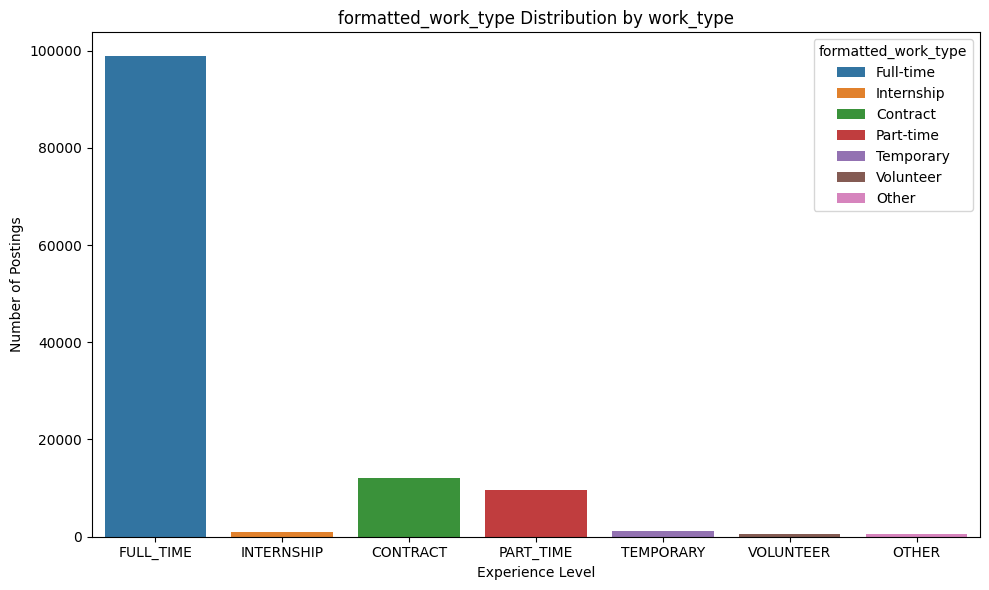

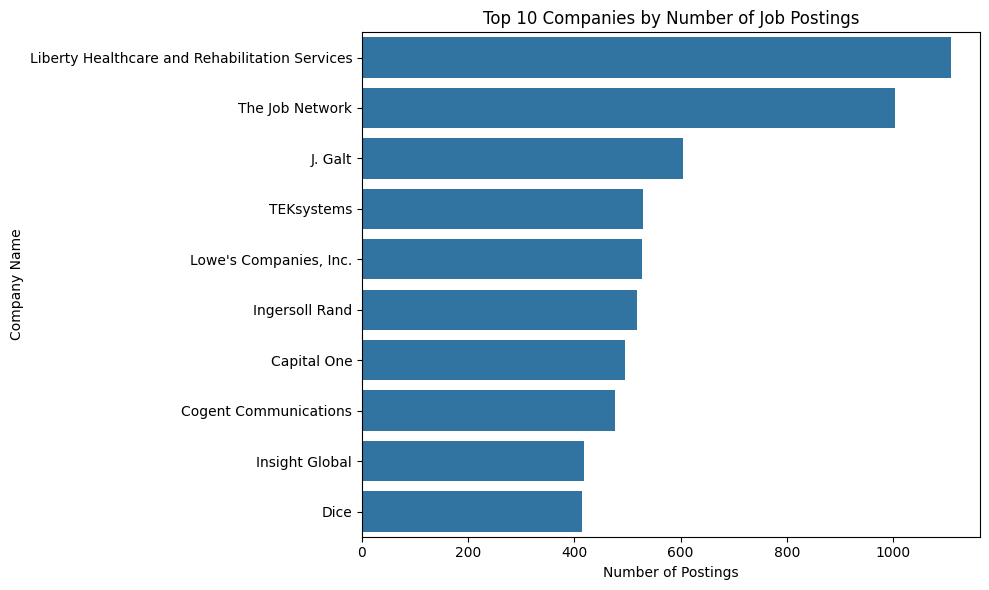

In [8]:
#  data types to understand what kind of plots are appropriate
print(df.info())

# plot1: Relationship between work_type and job type (if both columns exist)
if 'work_type' in df.columns and 'formatted_work_type' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='work_type', hue='formatted_work_type')
    plt.title('formatted_work_type Distribution by work_type')
    plt.xlabel('Experience Level')
    plt.ylabel('Number of Postings')
    plt.tight_layout()
    plt.show()


# plot2: Top N companies by number of postings
if 'company_name' in df.columns:
    top_companies = df['company_name'].value_counts().nlargest(10) # Adjust N as needed
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_companies.values, y=top_companies.index)
    plt.title('Top 10 Companies by Number of Job Postings')
    plt.xlabel('Number of Postings')
    plt.ylabel('Company Name')
    plt.tight_layout()
    plt.show()
else:
    print("'company_name' column not found.")

/tmp/ipython-input-1696888090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


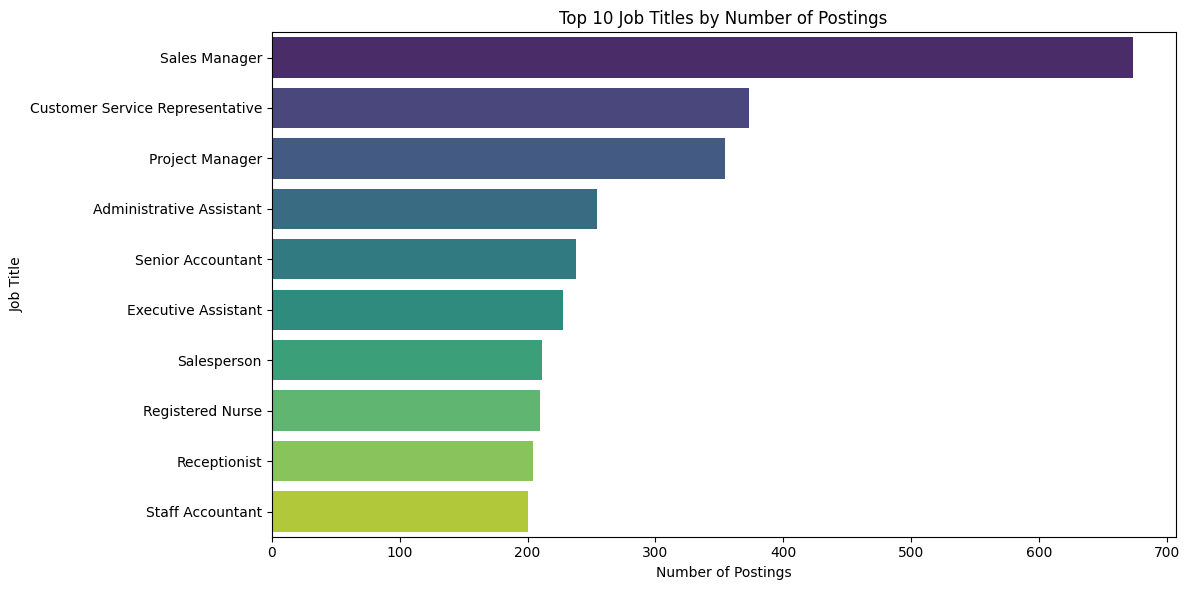

In [9]:
# Visualize the top N job titles
if 'title' in df.columns:
    top_n_titles = 10 # Adjust N as needed
    top_titles = df['title'].value_counts().nlargest(top_n_titles)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
    plt.title(f'Top {top_n_titles} Job Titles by Number of Postings')
    plt.xlabel('Number of Postings')
    plt.ylabel('Job Title')
    plt.tight_layout()
    plt.show()
else:
    print("'title' column not found.")

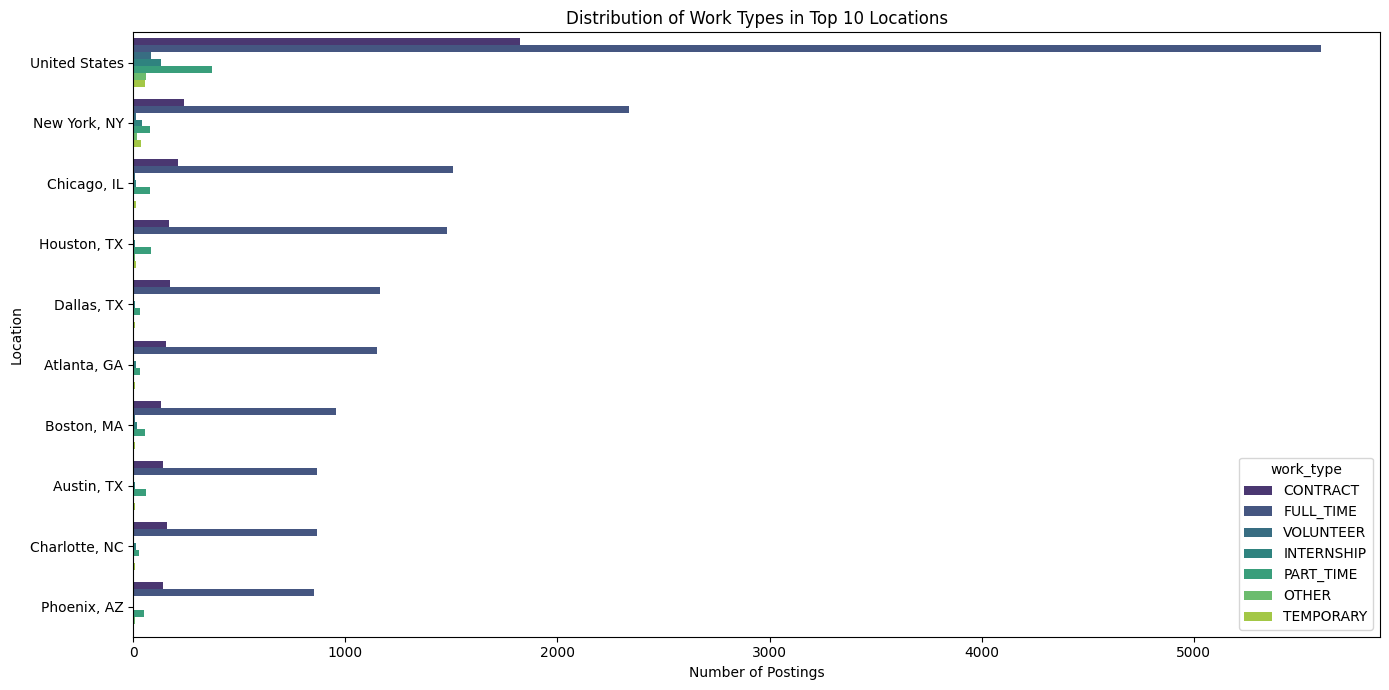

In [10]:
# Visualize the distribution of work types by location for the top N locations
if 'work_type' in df.columns and 'location' in df.columns:
    top_n_locations = 10 # Use the same N as the previous location plot

    # Get the top N locations
    top_locations = df['location'].value_counts().nlargest(top_n_locations).index.tolist()

    # Filter the DataFrame to include only the top locations
    df_top_locations = df[df['location'].isin(top_locations)]

    plt.figure(figsize=(14, 7))
    sns.countplot(data=df_top_locations, y='location', hue='work_type', order=top_locations, palette='viridis')
    plt.title(f'Distribution of Work Types in Top {top_n_locations} Locations')
    plt.xlabel('Number of Postings')
    plt.ylabel('Location')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot work type distribution by location (one or both columns missing).")

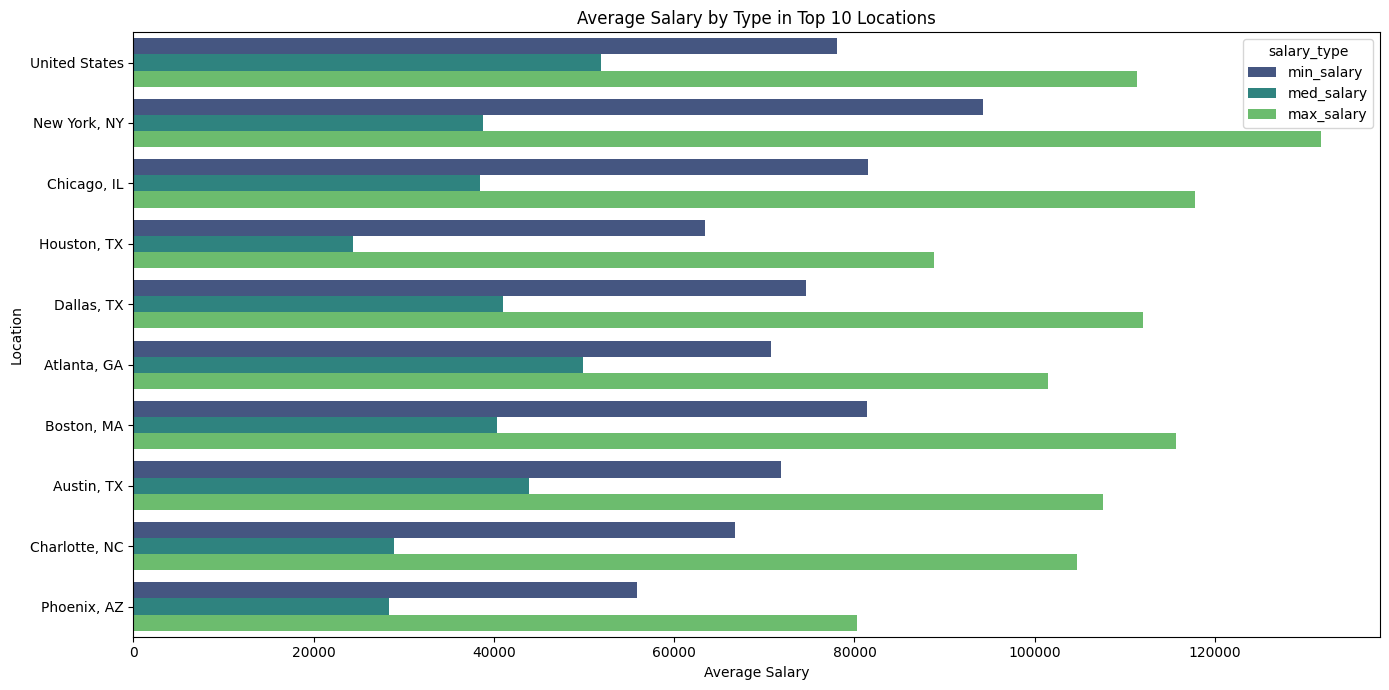

In [11]:
# Analyze and visualize salary distribution by location for top N locations

if 'location' in df.columns and ('min_salary' in df.columns or 'max_salary' in df.columns or 'med_salary' in df.columns):
    top_n_locations = 10 # Use the same N as before

    # Get the top N locations
    top_locations = df['location'].value_counts().nlargest(top_n_locations).index.tolist()

    # Filter the DataFrame to include only the top locations and relevant salary columns
    salary_cols = ['min_salary', 'med_salary', 'max_salary']
    available_salary_cols = [col for col in salary_cols if col in df.columns]

    if available_salary_cols:
        df_top_locations_salary = df[df['location'].isin(top_locations)].copy()

        # Calculate average of available salary columns for each location
        # Handle cases where only one salary column is available
        if len(available_salary_cols) > 1:
            location_salary_stats = df_top_locations_salary.groupby('location')[available_salary_cols].mean().reset_index()
        elif len(available_salary_cols) == 1:
             location_salary_stats = df_top_locations_salary.groupby('location')[available_salary_cols[0]].mean().reset_index()
             location_salary_stats = location_salary_stats.rename(columns={available_salary_cols[0]: 'average_salary'})


        if not location_salary_stats.empty:
            # Melt the DataFrame for easier plotting with seaborn
            if len(available_salary_cols) > 1:
                location_salary_melted = location_salary_stats.melt(id_vars='location',
                                                                   value_vars=available_salary_cols,
                                                                   var_name='salary_type',
                                                                   value_name='average_salary')
            elif len(available_salary_cols) == 1:
                 location_salary_melted = location_salary_stats.melt(id_vars='location',
                                                                    value_vars=['average_salary'],
                                                                    var_name='salary_type',
                                                                    value_name='average_salary')


            plt.figure(figsize=(14, 7))
            sns.barplot(data=location_salary_melted, x='average_salary', y='location', hue='salary_type', palette='viridis', order=top_locations)
            plt.title(f'Average Salary by Type in Top {top_n_locations} Locations')
            plt.xlabel('Average Salary')
            plt.ylabel('Location')
            plt.tight_layout()
            plt.show()
        else:
            print("No salary data available for the top locations.")
    else:
        print("No valid salary columns found ('min_salary', 'max_salary', or 'med_salary').")

else:
    print("Cannot plot salary distribution by location (location column or salary columns missing).")

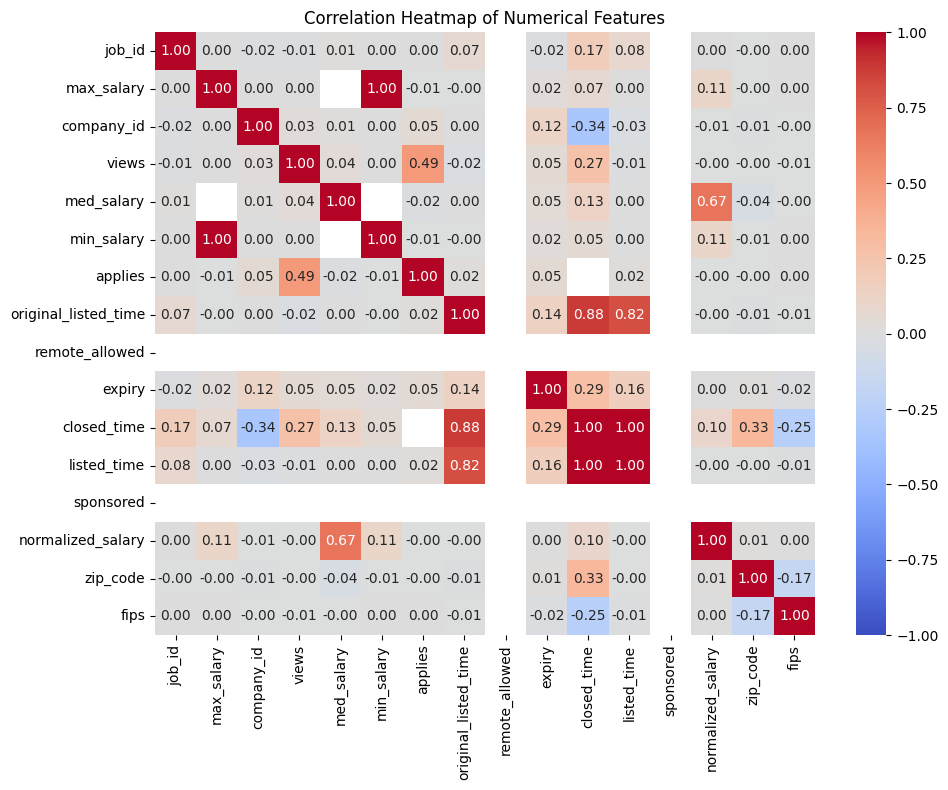

In [12]:

#  Correlation heatmap
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=[np.number])

if not numerical_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin = -1, vmax = 1)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for the correlation heatmap.")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.combine import SMOTETomek
import pandas as pd

# Assuming df is loaded and contains the necessary columns

# For predicting 'work_type' based on other features.
features = ['location', 'company_name', 'title']
target = 'work_type'

# Drop rows where any of the selected features or target are missing
df_model = df[features + [target]].dropna().copy()

# Encode the target variable
le = LabelEncoder()
df_model[target] = le.fit_transform(df_model[target])

# Split data into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify for balanced classes

# Encode categorical features
categorical_features = ['location', 'company_name', 'title']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough') # Keep other columns if any

# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Resample the training data using SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_processed, y_train)

print("Original training data shape (X_train):", X_train.shape)
print("Resampled training data shape (X_resampled):", X_resampled.shape)
print("Original training target distribution (y_train):\n", pd.Series(y_train).value_counts())
print("Resampled training target distribution (y_resampled):\n", pd.Series(y_resampled).value_counts())

Original training data shape (X_train): (97704, 3)
Resampled training data shape (X_resampled): (546292, 88714)
Original training target distribution (y_train):
 work_type
1    78042
0     9564
4     7590
5      941
2      764
6      444
3      359
Name: count, dtype: int64
Resampled training target distribution (y_resampled):
 work_type
2    78042
5    78042
4    78042
3    78042
6    78042
0    78041
1    78041
Name: count, dtype: int64


/tmp/ipython-input-1153708316.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


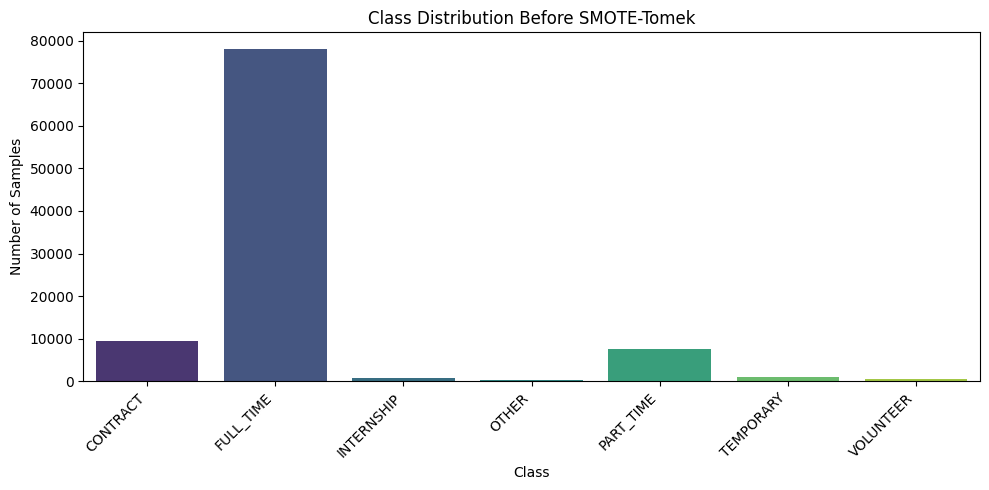

/tmp/ipython-input-1153708316.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


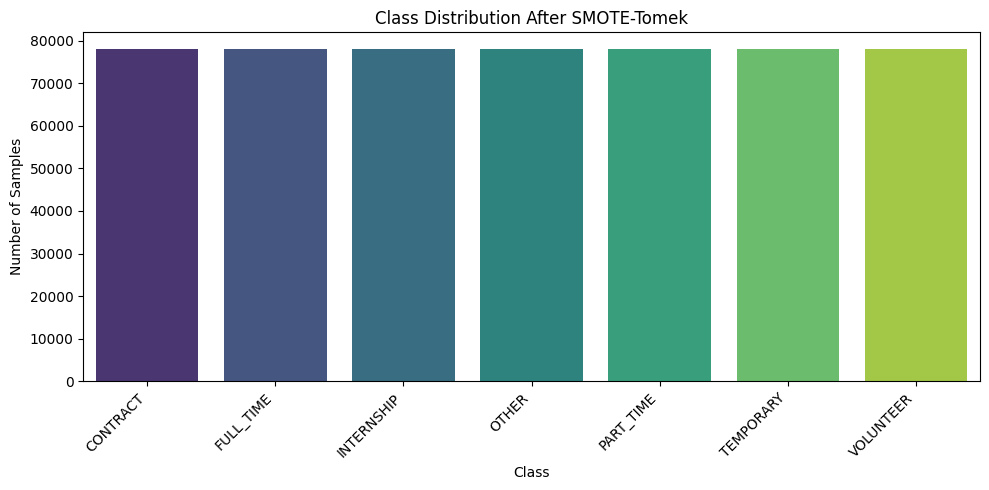

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for Series


if 'le' in locals():
    class_labels = le.classes_
else:

    class_labels = [f'Class {i}' for i in sorted(pd.Series(y_train).unique())]
    print("Warning: LabelEncoder 'le' not found. Using generic class labels.")


# Plot distribution before SMOTE-Tomek
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE-Tomek')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45, ha='right') # Set ticks and labels
plt.tight_layout()
plt.show()

# Plot distribution after SMOTE-Tomek
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE-Tomek')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=range(len(class_labels)), labels=class_labels, rotation=45, ha='right') # Set ticks and labels
plt.tight_layout()
plt.show()

Training Random Forest Model...
Random Forest Training Accuracy: 0.9984
Random Forest Validation Accuracy: 0.8941
Random Forest Classification Report:
               precision    recall  f1-score   support

    CONTRACT       0.86      0.61      0.72      2391
   FULL_TIME       0.90      0.98      0.94     19510
  INTERNSHIP       0.84      0.30      0.44       191
       OTHER       0.93      0.59      0.72        90
   PART_TIME       0.84      0.52      0.64      1898
   TEMPORARY       0.83      0.44      0.58       235
   VOLUNTEER       0.99      0.84      0.91       111

    accuracy                           0.89     24426
   macro avg       0.88      0.61      0.71     24426
weighted avg       0.89      0.89      0.88     24426

Random Forest Confusion Matrix:
 [[ 1469   920     0     0     2     0     0]
 [  219 19076     7     3   184    21     0]
 [    0   131    57     0     2     0     1]
 [    0    37     0    53     0     0     0]
 [    9   896     4     1   988     0 

/tmp/ipython-input-1877356266.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


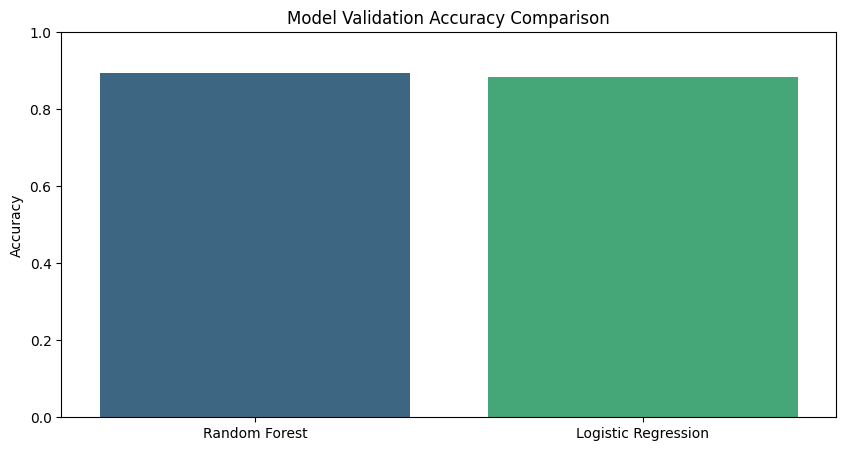

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# For predict 'work_type' based on other features.
features = ['location', 'company_name', 'title']
target = 'work_type'

# Drop rows where any of the selected features or target are missing
df_model = df[features + [target]].dropna().copy()

# Encode categorical features
categorical_features = ['location', 'company_name', 'title']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough') # Keep other columns if any

# Encode the target variable
le = LabelEncoder()
df_model[target] = le.fit_transform(df_model[target])

# Split data into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify for balanced classes

# --- Model Training with Epochs and Accuracy Tracking ---
n_epochs = 50 # Define the number of epochs

# Random Forest with Epochs
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


print("Training Random Forest Model...")
rf_pipeline.fit(X_train, y_train)

rf_train_accuracy = rf_pipeline.score(X_train, y_train)
rf_val_accuracy = rf_pipeline.score(X_test, y_test)

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pipeline.predict(X_test), target_names=le.classes_))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pipeline.predict(X_test)))


print("\nTraining Logistic Regression Model...")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

lr_pipeline.fit(X_train, y_train)

lr_train_accuracy = lr_pipeline.score(X_train, y_train)
lr_val_accuracy = lr_pipeline.score(X_test, y_test)


print(f"Logistic Regression Training Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression Validation Accuracy: {lr_val_accuracy:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pipeline.predict(X_test), target_names=le.classes_))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pipeline.predict(X_test)))

# --- Plotting Accuracies ---
# we will plot the single final accuracy for comparison.
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_val_accuracy, lr_val_accuracy] # Using validation accuracy for comparison

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.title('Model Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


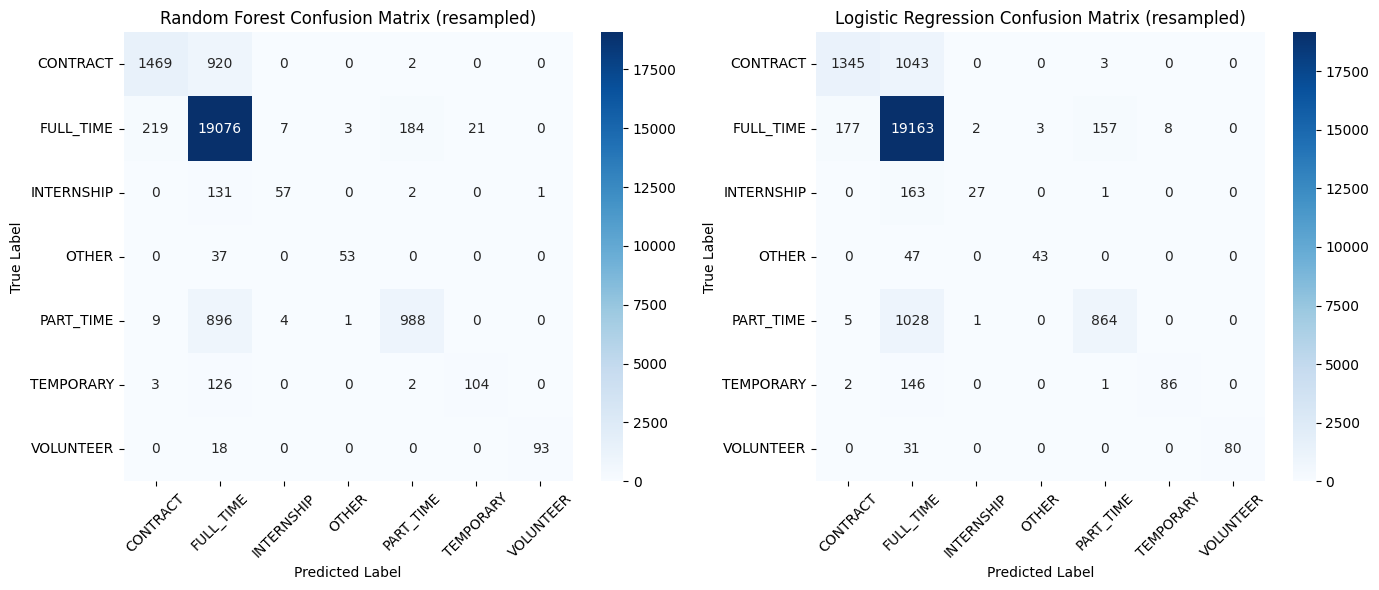

In [ ]:
# Plot Confusion Matrices with better labels
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure width

# Get the class labels
class_labels = le.classes_

# Generate predictions for both models
# Assuming rf_pipeline and lr_pipeline are defined and trained from previous steps
rf_pred = rf_pipeline.predict(X_test)
lr_pred = lr_pipeline.predict(X_test)


# Plot for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_labels, yticklabels=class_labels)
axes[0].set_title('Random Forest Confusion Matrix (resampled)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axes[0].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal

# Plot for Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=class_labels, yticklabels=class_labels)
axes[1].set_title('Logistic Regression Confusion Matrix (resampled)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axes[1].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal


plt.tight_layout()
plt.show()

In [ ]:
# Check if the index is already a DatetimeIndex with the name 'listed_time'
if isinstance(df.index, pd.DatetimeIndex) and df.index.name == 'listed_time':
    print("Index is already a DatetimeIndex with name 'listed_time'. Proceeding to resampling.")
    # No conversion needed, proceed directly to resampling
    pass # This is a placeholder, the resampling happens next
elif 'listed_time' in df.columns:
    # If 'listed_time' is a column, check its data type
    if not pd.api.types.is_datetime64_any_dtype(df['listed_time']):
        # If not already datetime, perform the conversion from timestamps
        print("'listed_time' is a column and not in datetime format. Converting to datetime and setting as index.")
        df['listed_time'] = pd.to_datetime(df['listed_time'] / 1000, unit='s')
    else:
        # If already datetime, just set as index
        print("'listed_time' is a column and already in datetime format. Setting as index.")

    df.set_index('listed_time', inplace=True)

else:
    print("Error: 'listed_time' column or index not found in the DataFrame.")


# Resample by day and count job postings
# This step is performed regardless of whether conversion happened, as long as the index is datetime
if isinstance(df.index, pd.DatetimeIndex):
    daily_postings = df.resample('D').size()
    # Display the first few entries of the daily_postings time series
    display(daily_postings.head())
else:
    print("DataFrame index is not a DatetimeIndex, cannot resample.")

'listed_time' is a column and already in datetime format. Setting as index.


,0
listed_time,
2024-03-24,1
2024-03-25,0
2024-03-26,0
2024-03-27,0
2024-03-28,0


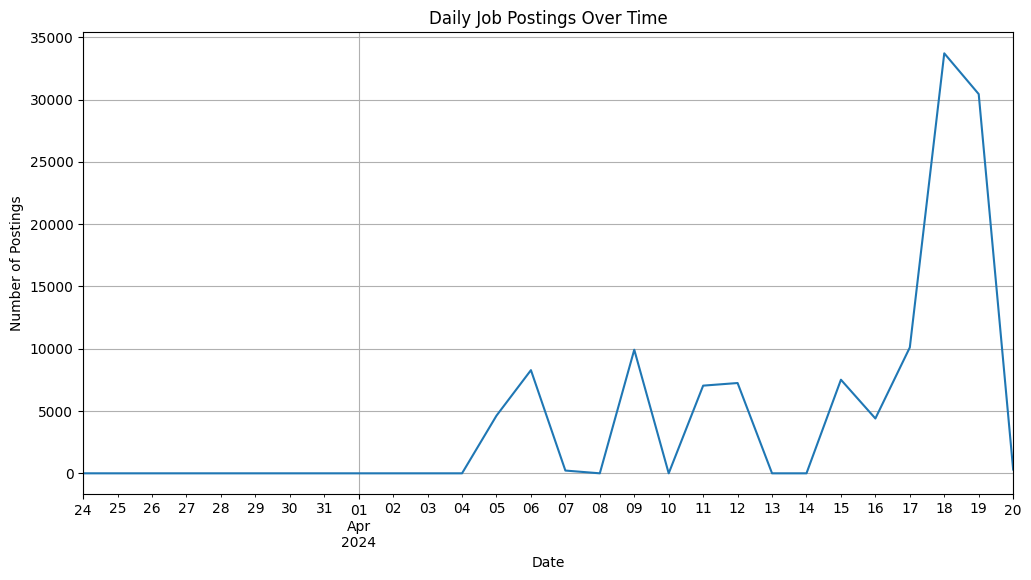

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the daily job postings time series
plt.figure(figsize=(12, 6))
daily_postings.plot()
plt.title('Daily Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# X_train_processed and X_test_processed are already created and processed in the previous step

# Determine the input dimension after one-hot encoding
input_dim = X_train_processed.shape[1]

# Determine the number of output classes (le is already defined and fitted)
num_classes = len(le.classes_)

# Reinitialize the Sequential model with the correct input dimension
model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))

# Add additional hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Recompile the model
optimizer = Adam(learning_rate=0.001) # Using Adam optimizer with a learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # Suitable for label-encoded integer targets
              metrics=['accuracy'])

# Define the number of epochs and batch size
n_epochs = 10
batch_size = 60 # You can adjust this value

# Train the model
history = model.fit(X_train_processed, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_processed, y_test),
                    verbose=1) # Set verbose to 1 to see training progress


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8306 - loss: 0.6691 - val_accuracy: 0.8866 - val_loss: 0.3642
Epoch 2/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9490 - loss: 0.1537 - val_accuracy: 0.8769 - val_loss: 0.4203
Epoch 3/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9843 - loss: 0.0475 - val_accuracy: 0.8588 - val_loss: 0.5326
Epoch 4/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9924 - loss: 0.0207 - val_accuracy: 0.8531 - val_loss: 0.6160
Epoch 5/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9958 - loss: 0.0111 - val_accuracy: 0.8490 - val_loss: 0.6733
Epoch 6/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9973 - loss: 0.0067 - val_accuracy: 0.8334 - val_loss: 0.7715
Epoch 7/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9980 - loss: 0.0051 - val_accuracy: 0.8305 - val_loss: 0.8297
Epoch 8/10
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9976 - loss: 0.0052 

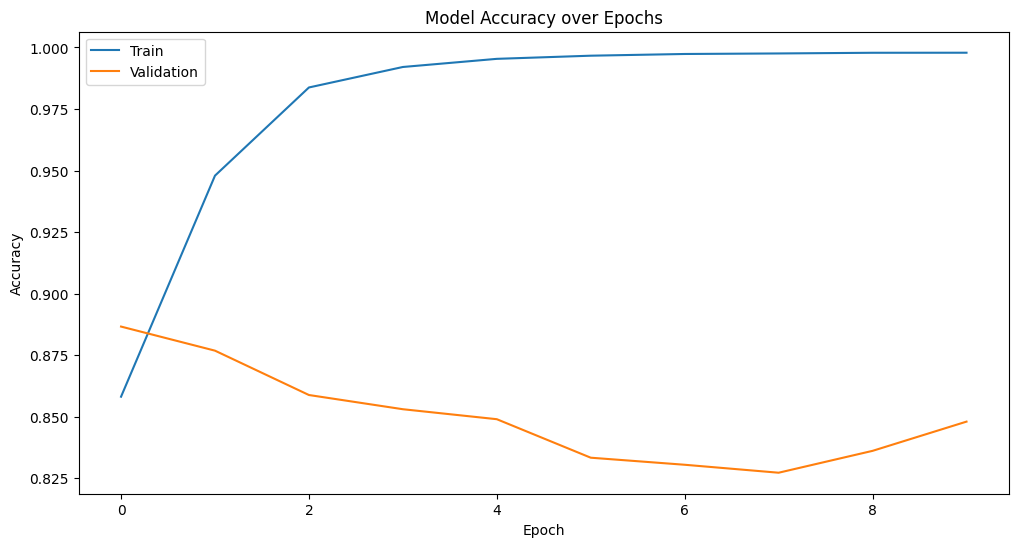

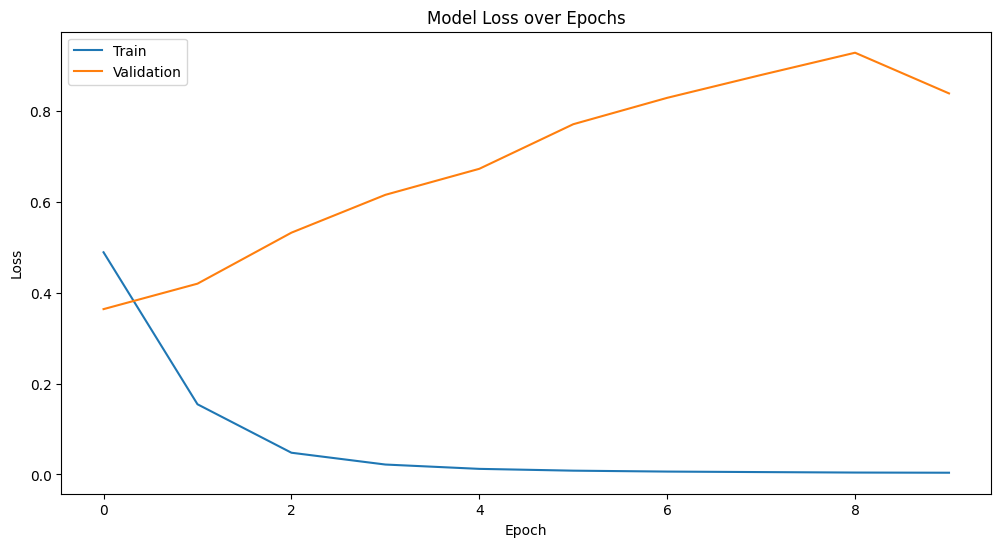

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Check for missing values
print("Missing values in daily_postings:", daily_postings.isnull().sum())

# Fill missing values (using forward fill as a reasonable assumption for time series)
daily_postings_filled = daily_postings.fillna(method='ffill')

# Check for missing values after filling
print("Missing values in daily_postings after filling:", daily_postings_filled.isnull().sum())

# Display the first few rows of the filled time series
display(daily_postings_filled.head())

# Check the data type of the index
print("Index data type:", daily_postings_filled.index.dtype)

Missing values in daily_postings: 0
Missing values in daily_postings after filling: 0


/tmp/ipython-input-4271964823.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_postings_filled = daily_postings.fillna(method='ffill')


,0
listed_time,
2024-03-24,1
2024-03-25,0
2024-03-26,0
2024-03-27,0
2024-03-28,0


Index data type: datetime64[ns]


In [ ]:
# Resample daily_postings to monthly frequency
monthly_postings = daily_postings.resample('M').sum()

# Resample daily_postings to yearly frequency
yearly_postings = daily_postings.resample('Y').sum()

print("Monthly Job Postings (first 5):")
display(monthly_postings.head())

print("\nYearly Job Postings:")
display(yearly_postings)

Monthly Job Postings (first 5):


/tmp/ipython-input-3458459443.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_postings = daily_postings.resample('M').sum()
/tmp/ipython-input-3458459443.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_postings = daily_postings.resample('Y').sum()


,0
listed_time,
2024-03-31,1
2024-04-30,123848



Yearly Job Postings:


,0
listed_time,
2024-12-31,123849


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd

# Prophet requires the time series data to be in a DataFrame with 'ds' (datetime) and 'y' (value) columns
prophet_df = daily_postings.reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize and train the Prophet model
# We can add seasonality modes if needed, but let's start with a basic model
model = Prophet()
model.fit(prophet_df)

print("Prophet model trained successfully.")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0l1tlms0/5sx33unz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0l1tlms0/h7urz9jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52865', 'data', 'file=/tmp/tmp0l1tlms0/5sx33unz.json', 'init=/tmp/tmp0l1tlms0/h7urz9jv.json', 'output', 'file=/tmp/tmp0l1tlms0/prophet_modellra7n0pr/prophet_model-20250910135645.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:56:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:56:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Prophet model trained successfully.


In [ ]:
# Create a future dataframe for forecasting
# Let's forecast for the next 30 days
future = model.make_future_dataframe(periods=30)

# Generate the forecast
forecast = model.predict(future)

# Display the first few rows of the forecast
print("Job Postings Forecast (first 5 days):")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Job Postings Forecast (first 5 days):


,ds,yhat,yhat_lower,yhat_upper
0,2024-03-24,-5786.231842,-13418.891697,2826.979645
1,2024-03-25,-3964.981297,-11688.748472,3978.492447
2,2024-03-26,-2263.904803,-10391.108939,5851.702936
3,2024-03-27,-3318.665308,-11278.624891,4663.874342
4,2024-03-28,4339.575325,-3457.315757,11987.529082


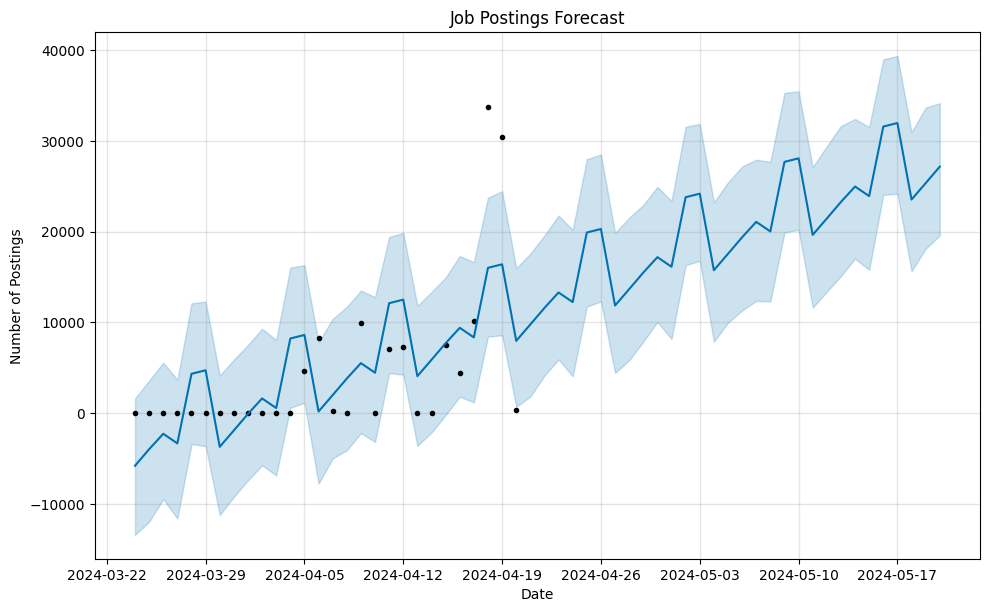

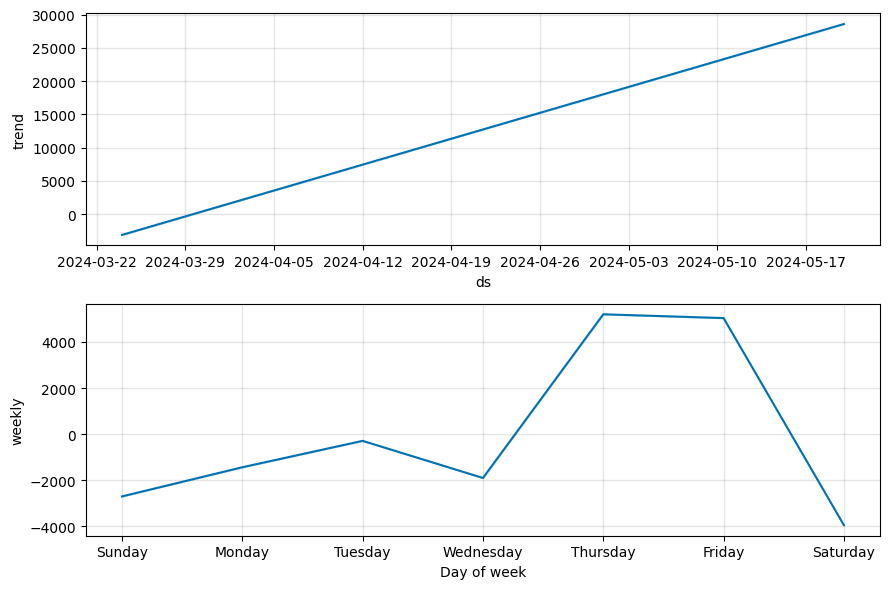

In [ ]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
ax = fig.gca()
ax.set_title('Job Postings Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Postings')
plt.show()

# Plot the forecast components (trend, weekly seasonality)
fig2 = model.plot_components(forecast)
plt.show()